# EDA

The purpose of this section is to get started on the EDA unit of DSC on my dev df. I still need to crunch the whole df, but by the time I do that I'll have "finished" EDA, or at least I'll know what plots I will want.

### General questions to explore

Some questions I'll be exploring in this notebook in turn include:

1. What is the general distribution of variables? When I see this, are there any more outliers to account for?

2. Looking at bivariate data, what are the distributions of age by gender for example?

3. What is the correlation between cost per ride and duration of rides? How are costs and durations distributed?

4. Is the bike share trip for all column worth looking into?

5. Is there patterning in the bikes that are most vs. least profitable?

6. Is there a relationship between cost, ride length, and gender? User type?

7. How can I visualize the data on maps?

### Questions to analyze further and business cases for analyzing them:

1. Given a departure station, what is the revenue from the individual ride? Reason: to learn what the most profitable stations are to look into increasing funding, bike supply, etc. at that/those stations.

2. Given a rider's age and gender, how likely are they to do an above average value ride. Reason: target marketing campaigns towards consumers who match that demographic to increase revenue.

3. What is the most popular time of day and day of week to ride the bikes? Reason: campaigns and push notifications can be used for on subscribers to encourage them to take a bike. After this, you can do an A/B test to measure the efficacy of those efforts (i.e. did ridership increase after implementing these? If so, is it due to random chance or not [statistical test]?)

In [1]:
import pandas as pd, numpy as np
dev_df = pd.read_csv('dev_df.csv')

In [2]:
# First define commonly use columns as variables:

mins = dev_df['duration_min']

costs = dev_df['cost_to_ride']

genders = dev_df['member_gender']

ages = dev_df['age']

#### 1. What is the general distribution of variables? When I see this, are there any more outliers to account for?


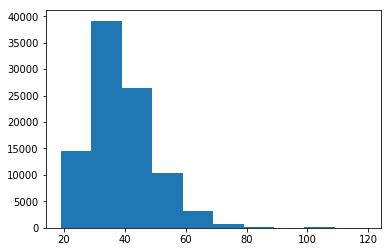

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(dev_df['age']);

Based on the histogram above, I've decided to remove values >= 100

In [3]:
# simplify the name of the df
dev_df = dev_df[dev_df['age'] < 100]

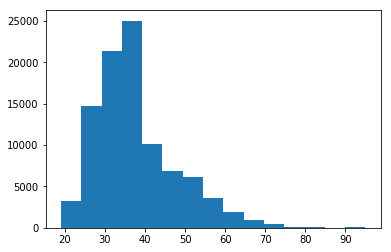

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

age = dev_df['age']

plt.hist(x=age, bins = 15);

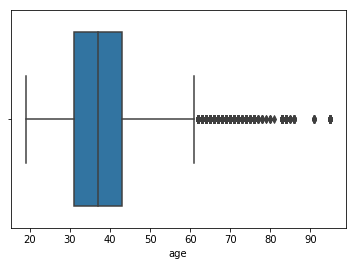

In [6]:
import seaborn as sns

sns.boxplot(age);

In [4]:
dev_df = dev_df[dev_df['age'] < 90]

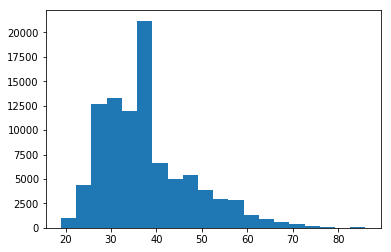

In [8]:
age = dev_df['age']

plt.hist(x=age, bins = 20);
plt.show()

Honestly I could cut this down to a max age of 75, it doesn't really matter - bikesharing is such a milennial thing.

#### 2. Looking at bivariate data, what are the distributions of age by gender for example?

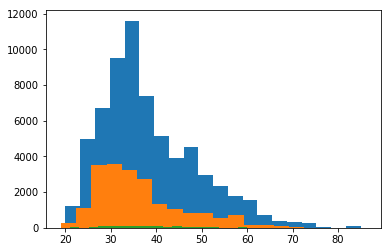

In [9]:
# take a look at the distribution by gender below

men = dev_df[dev_df['member_gender'] == 0.0]['age']
women = dev_df[dev_df['member_gender'] == 1.0]['age']
other = dev_df[dev_df['member_gender'] == 2.0]['age']

plt.hist(x=men, bins = 20)
plt.hist(x=women, bins = 20)
plt.hist(x=other, bins = 20)
plt.show();

#### 3. What is the correlation between cost per ride and duration of rides? How are costs and durations distributed?

In [10]:
mins = dev_df['duration_min']
mins.describe()

count    94649.000000
mean        14.519498
std         42.544654
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max       1426.000000
Name: duration_min, dtype: float64

In [5]:
dev_df['start_time'] = pd.to_datetime(dev_df['start_time'])
dev_df['end_time'] = pd.to_datetime(dev_df['end_time'])

dev_df['start_time'][0].hour

# slightly offset, since most rides are under 30 min and most 

#plt.hist(start_hours, bins=22)
#plt.hist(end_hours, bins=22, alpha=0.5)

22

In [6]:
start_hours = dev_df['start_time'].apply(lambda x: x.hour)

end_hours = dev_df['end_time'].apply(lambda x: x.hour)

days = dev_df['end_time'].apply(lambda x: x.day)

In [7]:
days_list = days.value_counts(ascending=True).index.tolist()

counts = days.value_counts(ascending=True).tolist()

d= {'days':days_list,
    'counts':counts}

day_counts = pd.DataFrame(d)

day_counts = day_counts.sort_values(['days'])

In [8]:
sns.barplot(x=day_counts.days, y=day_counts.counts);

NameError: name 'sns' is not defined

There's an interesting cyclic pattern in that the peaks are around the beginning of weeks, with higher peaks progressively through the month and the max number of rides being at the end.

(array([2960., 4513., 5197., 2172., 2088., 5360., 5755., 5445., 2274.,
        6243., 5992., 5080., 3642., 4423., 7319., 5672., 4712., 4537.,
        6824., 4441.]),
 array([736695.00701668, 736696.59789259, 736698.18876851, 736699.77964443,
        736701.37052034, 736702.96139626, 736704.55227217, 736706.14314809,
        736707.73402401, 736709.32489992, 736710.91577584, 736712.50665176,
        736714.09752767, 736715.68840359, 736717.2792795 , 736718.87015542,
        736720.46103134, 736722.05190725, 736723.64278317, 736725.23365908,
        736726.824535  ]),
 <a list of 20 Patch objects>)

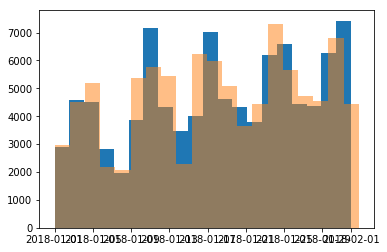

In [84]:
# start and end hist
plt.hist(dev_df['start_time'], bins=20)
plt.hist(dev_df['end_time'], bins=20, alpha=0.5)

Rides end slightly offset from the time they begin, which of course makes sense because the avg. duration of rides is between 10 and 15 minutes (median and mean respecitvely).

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


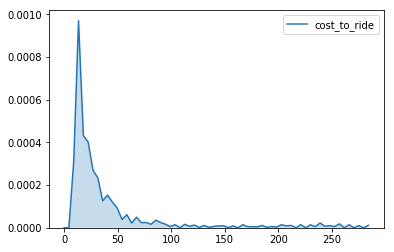

In [87]:
sns.kdeplot(dev_df['cost_to_ride'], shade=True, gridsize=40)

The cost of rides is left skewed too and most rides are under $50 or even $10.

#### 4. Is the bike share trip for all column worth looking into?

In [16]:
# considering dropping this, or if I know the date it launched I can see if it increased revenue for Lyft or not
dev_df['bike_share_for_all_trip'].value_counts()

No     88548
Yes     6101
Name: bike_share_for_all_trip, dtype: int64

I'm not sure I care as much, it's a small number of trips and it doesn't increase revenue.

#### 5. Is there patterning in the bikes that are most vs. least profitable?

In [88]:
# melt it down
bike_revenue = dev_df.pivot_table(values='cost_to_ride', columns='bike_id', aggfunc='sum').melt()

In [89]:
# best performer to least performer
bike_revenue = bike_revenue.sort_values('value', ascending=False)
bike_revenue

bike_id  value
280       364    410
2195     2765    355
223       292    342
814      1107    327
2254     2841    324
1720     2201    320
2234     2815    314
571       713    303
2971     3642    296
2982     3653    287
2987     3658    287
553       690    286
2052     2593    281
1165     1518    279
3063     3743    279
2500     3136    278
87        125    274
2928     3597    273
1994     2525    271
2768     3430    270
307       398    268
1880     2388    268
2712     3374    267
952      1266    267
2101     2658    265
539       676    265
864      1164    265
2458     3090    265
2321     2922    262
1431     1848    262
...       ...    ...
2095     2649      0
1456     1882      0
587       752      0
2099     2656      0
1446     1870      0
1445     1869      0
593       764      0
594       765      0
1441     1863      0
1434     1851      0
2628     3284      0
1433     1850      0
2625     3281      0
2623     3279      0
621       799      0
624       802      0
1424     1841      0
2616     3269      0
630       808      0
2612     3264      0
632       810      0
634       812      0
640       821      0
641       822      0
642       823      0
2600     3252      0
2119     2679      0
2597     3249      0
645       826      0
1532     1969      0

[3065 rows x 2 columns]

In [90]:
# There are not many bikes that make more than $300 so filtering down here

bike_revenue = bike_revenue[bike_revenue['value'] < 300]

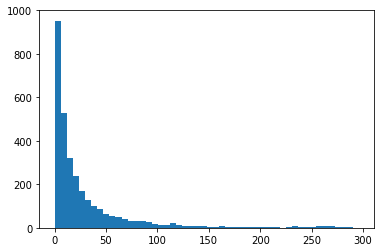

In [92]:
# distribution of value by bike
plt.hist(bike_revenue.value, bins=50);

It makes sense that the cost of rides by bike is similar in distribution to the duration of rides and costs of rides.

In [93]:
#bike 3642 has accrued the most value

bike_revenue[bike_revenue['value'] > 250].sort_values('value', ascending=False)

bike_id  value
2971     3642    296
2987     3658    287
2982     3653    287
553       690    286
2052     2593    281
1165     1518    279
3063     3743    279
2500     3136    278
87        125    274
2928     3597    273
1994     2525    271
2768     3430    270
307       398    268
1880     2388    268
2712     3374    267
952      1266    267
864      1164    265
2458     3090    265
539       676    265
2101     2658    265
2321     2922    262
1431     1848    262
2438     3066    262
695       962    262
316       408    262
2291     2889    260
408       519    260
63         93    258
88        126    258
913      1221    257
1984     2513    256
3005     3676    256
1526     1962    255
1997     2528    254
3008     3679    251

### More data viz and mapping

#### 6. Is there a relationship between cost, ride length, and gender? User type?

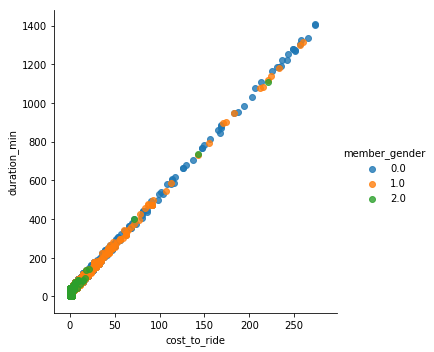

In [94]:
# plotting cost and duration colored by gender
sns.lmplot(x='cost_to_ride', y='duration_min', hue='member_gender', data=dev_df, fit_reg=False)

Naturally duration of ride and cost are very correlated, but interestingly we see a bunching of lower cost and shorter rides for gender Female and Other (1 and 2 respectively).

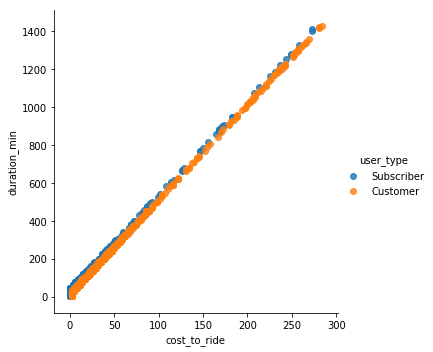

In [25]:
# cost and duration colored by user type
sns.lmplot(x='cost_to_ride', y='duration_min', hue='user_type', data=dev_df, fit_reg=False)

It doesn't seem like there are any differecnces really between subscribers and customers, though in terms of cost it makes sense that customer user types are more spread out across this spectrum since they accrue higher costs. It doesn't seem like accruing higher costs for riding longer is deterring them from partaking though which is interesting.

#### 7. How can I visualize the data on maps?

In [95]:
dev_df.head()

Unnamed: 0  duration_min              start_time                end_time  \
0           0        1255.0 2018-01-31 22:52:35.239 2018-02-01 19:47:19.824   
1           4         666.0 2018-01-31 19:52:24.667 2018-02-01 06:58:31.053   
2           6           8.0 2018-01-31 23:53:53.632 2018-02-01 00:01:26.805   
3           7           3.0 2018-01-31 23:52:09.903 2018-01-31 23:55:10.807   
4           8          17.0 2018-01-31 23:34:56.004 2018-01-31 23:51:32.674   

   cost_to_ride  start_station_id  start_station_latitude  \
0           243               120               37.761420   
1           126                74               37.776435   
2             0               110               37.763708   
3             0                81               37.775880   
4             0               134               37.752428   

   start_station_longitude  end_station_id  end_station_latitude  \
0              -122.426435             285             37.783521   
1              -122.426244              19             37.788975   
2              -122.415204             134             37.752428   
3              -122.393170              93             37.770407   
4              -122.420628               4             37.785881   

   end_station_longitude  bike_id   user_type  age  member_gender  \
0            -122.431158     2765  Subscriber   33            0.0   
1            -122.403452      617  Subscriber   28            0.0   
2            -122.420628     3571  Subscriber   31            0.0   
3            -122.391198     1403  Subscriber   39            0.0   
4            -122.408915     3675  Subscriber   32            0.0   

  bike_share_for_all_trip  
0                      No  
1                      No  
2                      No  
3                      No  
4                     Yes

In [10]:
dev_df.to_csv("./dev_df_post_EDA_cleaning.csv")

Below is the main riding areas (SF and East Bay). There are rides in the San Jose location as well but I'm not as interested in that area.

In [96]:
import folium # Use the Folium Javascript Map Library
import folium.plugins

# for some reason folium doesn't work for more than 66000 data points, so I will sample for now and that'll work in a pinch
sample = dev_df[:40000]

SF_COORDINATES = (37.77, -122.35)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=11)
locs = sample[['start_station_latitude', 'start_station_longitude']].astype('float').dropna().as_matrix()
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
sf_map.add_child(heatmap)

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [1]:
SF_COORDINATES = (37.77, -122.41)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = sample[['start_station_latitude', 'start_station_longitude']].astype('float').dropna().as_matrix()
heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
sf_map.add_child(heatmap)

NameError: name 'folium' is not defined

It is not surprising that the majority of rides begin in SOMA or the Mission. I wonder where the majority of rides end? Presumably FiDi? If so, this supports my hypothesis that we have a lot of commuters.

In [98]:
# I'll be doing a lot of mapping, so let's make a function:

def map_plotter(coordinates, map_loc=(37.77, -122.41), zoom_start=13):
    SF_COORDINATES = map_loc
    sf_map = folium.Map(location=SF_COORDINATES, zoom_start=zoom_start)
    locs = coordinates[['start_station_latitude', 'start_station_longitude']].astype('float').dropna().as_matrix()
    heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
    return sf_map.add_child(heatmap)

map_plotter(sample[['start_station_latitude', 'start_station_longitude']], map_loc=(37.77, -122.41))

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [99]:
# I'll be doing a lot of mapping, so let's make a function:

def map_plotter(coordinates, map_loc=(37.77, -122.41), zoom_start=13):
    SF_COORDINATES = map_loc
    sf_map = folium.Map(location=SF_COORDINATES, zoom_start=zoom_start)
    locs = coordinates[['end_station_latitude', 'end_station_longitude']].astype('float').dropna().as_matrix()
    heatmap = folium.plugins.HeatMap(locs.tolist(), radius = 10)
    return sf_map.add_child(heatmap)

map_plotter(sample[['end_station_latitude', 'end_station_longitude']], map_loc=(37.77, -122.41))

c:\users\riley\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


The start and end stations are almost identically distributed in terms of number of rides. This could be an indication that people go to and from similar locations which makes sense logistically. It will take more exploration to understand why that may be.

### Future directions and increasing the depth of EDA:

8. Plot reasonably sized points on the map for the stations, not as a heatmap, to get the lay of the land.

9. Make a heatmap of the number of rides started and ended by hour, by day, by year.

10. Figure out the most profitable bike station. Is there a correlation between this and location?

11. Use categoricals in mapping somehow: Do more men or women start from a particular station? Do more men or women end up at a certain station?

12. What is the average duraiton of ride by hour of day?

13. Do subscribers go further than customers? (hypothesis: yes because they have more time "before" they pay)

12. What are the age groups after you bucket them, not just the distribution?

13. After bucketing, do age groups have particular behavior? particular: duration of ride, departure locations, arrival locations, number of rides, subscribers vs. customers, etc.